# Real Estate Price Prediction

In [1]:
import pandas as pd


In [2]:
housing  = pd.read_csv("Data Final.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    470
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,500.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.283184,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.705697,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.883000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.198500,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.626000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline


In [8]:
# import matplotlib.pyplot as plt
# housing.hist(bins=50,figsize=(20,15))

## Train-Test Splitting


In [9]:
# For Learning Purpose
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled= np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices= shuffled[:test_set_size]
    train_indices= shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
train_set,test_set= split_train_test(housing,0.2)

[173 274 490  72 305  76 476 140 470 499 218   9 480  78 322 312 124 384
 195 447 271 278  30 500 420 444  79 318 210 496 172 453 374 358 494 153
   2 335 208  73 495 451 204  68  90 299  33  70 469   0  11 281  22 101
 268 484 441 290  84 245  63  55 229  18 410 209 394  82  39 455  46 412
 314 354  77 397 104 203 380 488  69 407 255 391 311 234 473 323  93 137
 176 336 131 502 364 132 331 411 503 349  86  75 442  15 325 388  19 324
 334  56 338 408 333 181 227 426 180  25 329 238 244 250 417 117  42 321
 346 182 155 280 126 448  31 113 148 429 400  57 194  24  17 297  66 211
 403  94 154 440  23 225 432 446   5 116  45  16 467 361   3 294 185  60
 110 320 265  29 262 477  26   7 457 108  37 157 471 118 114 175 192 272
 144 489 382 355 277 220 449 141 368  67 360 168 498 378 365 193 249 109
 433 145  92 152 222 409  83 248 165 163 199 231  74 310 454 253 119 284
 301 482 356 402 228 261 237 437 475  36 196 139 367 247 287 377  59 111
  89 266   6 456 347 340 158 150 177 396 184 317  1

In [11]:
# print(f"Rows in train set:{len(train_set)} \n Rows in test set: {len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)} \n Rows in test set: {len(test_set)}\n")

Rows in train set:404 
 Rows in test set: 101



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
                                          strat_train_set = housing.loc[train_index]
                                          strat_test_set = housing.loc[test_index]

In [14]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [15]:
housing= strat_train_set.copy()

# Looking For Correlations


In [16]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.660514
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
LSTAT     -0.739129
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

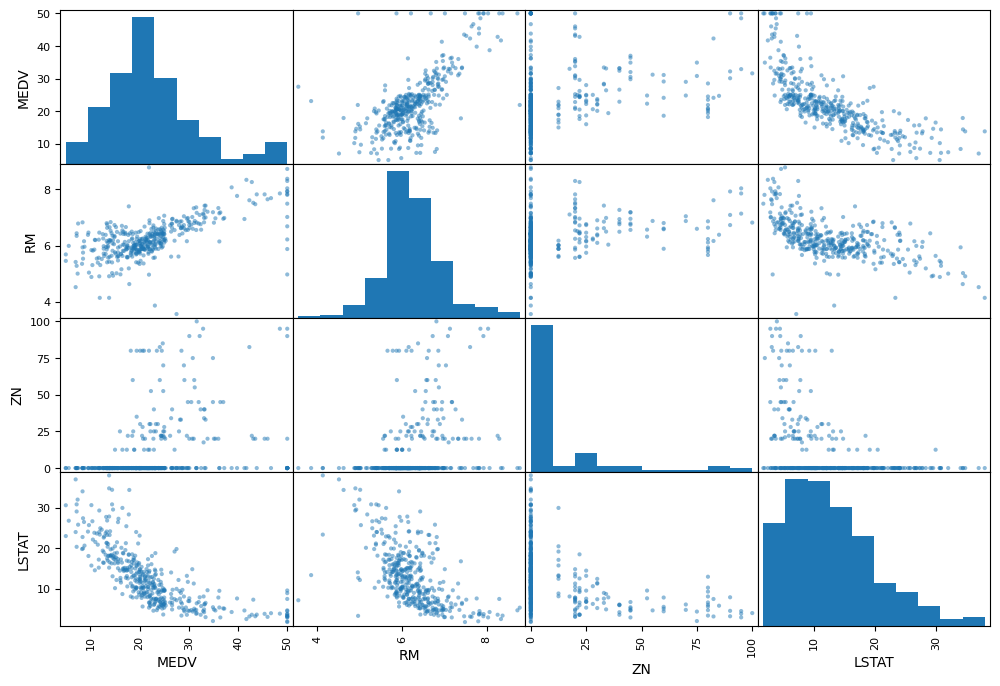

In [17]:
from pandas.plotting  import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize =(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

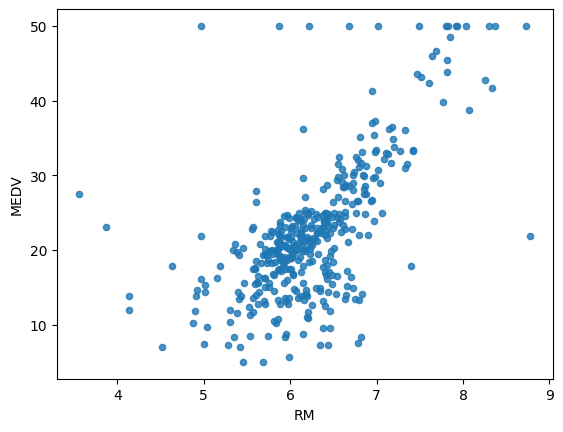

In [18]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

## Trying Out Attribute Combinations

In [19]:
housing["TAXRM"]= housing['TAX']/ housing['RM']

In [20]:
housing.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,20.9,53.607897
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6,48.277850
476,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0,125.565611
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4,47.508691
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2,47.180667


In [21]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.660514
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
TAXRM     -0.506879
LSTAT     -0.739129
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

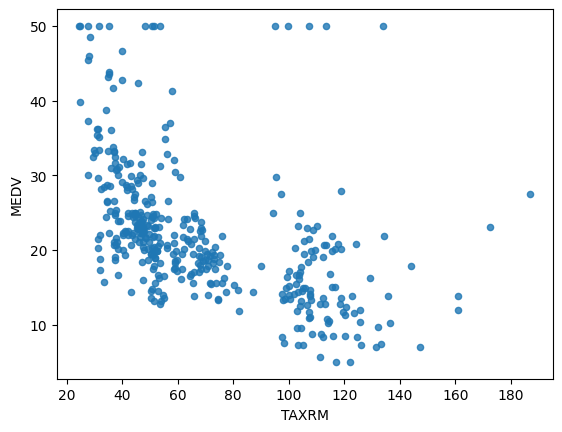

In [22]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [23]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes


In [24]:
# To take care of missing attributes, you have three options:
     # 1. Get rid of the missing data points
     # 2. Get rid of the whole attribute
     # 3. Set the value to some value(0, mean or median)

In [25]:
a=housing.dropna(subset=["RM"]) # Option1
a.shape
# note that the original housing dataframe will remain unchanged

(400, 13)

In [26]:
housing.drop("RM", axis=1).shape # Option 2
# Note that there is no RM Column and also note that the original housing dataframe will reamin unchanged

(404, 12)

In [27]:
median = housing["RM"].median() #Compute median for Option 3

In [28]:
housing["RM"].fillna(median) # Option 3
# note that the original housing dataframe will remain unchanged

254    5.876
348    6.939
476    5.304
321    6.041
326    6.083
       ...  
154    6.152
423    5.565
98     7.416
455    5.976
215    5.888
Name: RM, Length: 404, dtype: float64

In [29]:
housing.shape

(404, 13)

In [30]:
housing.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.249223,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.691126,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.873500,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.173000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.604500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [31]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([2.9025e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.1730e+00, 7.7500e+01, 3.1675e+00, 5.0000e+00, 3.3600e+02,
       1.9050e+01, 3.9094e+02, 1.1570e+01])

In [33]:
X= imputer.transform(housing)

In [34]:
housing_tr = pd.DataFrame(X,columns= housing.columns)

housing_tr.describe()

## Scikit-Learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameters based on a dataset. Eg. imputerIt has a fit method and transform method. Fit Method- Fits the dataset and calculates internal parameters

2. Transformers- Transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors- LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.
 

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling( Normalization)
    (value-min)/(max-min)
    Sklearn provides a class called MinMaxScaler for this
2. Standardization
     (value-mean)/std
     Sklearn provides a class called StandardScaler for this

## Creating a Pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy= "median")),
    # ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [36]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [37]:
housing_num_tr.shape

(404, 13)

# Selecting a desired model for Real Estates Cost Prediction

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model= DecisionTreeRegressor()
# model= LinearRegression()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [39]:
some_data = housing.iloc[:5]

In [40]:
some_labels = housing_labels.iloc[:5]

In [41]:
prepared_data = my_pipeline.transform(some_data)

In [42]:
model.predict(prepared_data)

array([20.699, 27.545, 12.247, 20.918, 22.166])

In [43]:
list(some_labels)

[20.9, 26.6, 12.0, 20.4, 22.2]

## Evaluating the model

In [44]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [45]:
rmse

1.1575705429394738

## Using Better Evaluation Technique- Cross Validation

In [46]:
# 1 2 3 4 5 6 7 8 9
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model,housing_num_tr,housing_labels,scoring= "neg_mean_squared_error",cv=10)
rmse_scores= np.sqrt(-scores)

In [47]:
rmse_scores

array([3.25168835, 2.49776277, 5.04878811, 2.70089357, 2.80456334,
       2.51314055, 2.79960031, 3.00964293, 2.41678658, 4.02541133])

In [48]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:", scores.std())
    

In [49]:
print_scores(rmse_scores)

Scores: [3.25168835 2.49776277 5.04878811 2.70089357 2.80456334 2.51314055
 2.79960031 3.00964293 2.41678658 4.02541133]
Mean: 3.1068277832949933
Standard Deviation: 0.7871182781436216


## Saving The Model

In [50]:
from joblib import dump, load
dump(model, 'RealEstate.joblib')

['RealEstate.joblib']

## Testing the model on test data

In [57]:
X_test = strat_test_set.drop("MEDV",axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions,list(Y_test))

In [55]:
final_rmse

3.351283154580975

In [58]:
prepared_data[0]

array([-0.44241248,  3.18716752, -1.12581552, -0.27288841, -1.42038605,
       -0.54226237, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
       -0.99428207,  0.43852974, -0.49833679])

## Using The Model

In [60]:
from joblib import dump,load
import numpy as np
model= load( 'RealEstate.joblib')
features = np.array([[-0.44241248,  10.18716752, -1.12581552, -0.27288841, -1.42038605,
       -0.54646, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
       -0.99428207,  0.43852974, -0.49833679]])
model.predict(features)

array([20.687])